In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from catboost import CatBoostClassifier

from expected_tackling.visualization.metrics import plot_confusion_matrix

pd.set_option('display.max_columns', 500)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
features_data = pd.concat([pd.read_csv(f"../data/features_week_{i}.csv") for i in range(1,10)])

In [4]:
features_data

,gameId,playId,nflId,frameId,x,y,playDirection,will_tackle,s,a,dis,o,dir,a_blocker_1,a_blocker_2,a_blocker_3,dir_blocker_1,dir_blocker_2,dir_blocker_3,direction_to_ball_carrier,direction_to_blocker_1,direction_to_blocker_2,direction_to_blocker_3,dis_blocker_1,dis_blocker_2,dis_blocker_3,distance_to_ball_carrier,distance_to_blocker_1,distance_to_blocker_2,distance_to_blocker_3,o_blocker_1,o_blocker_2,o_blocker_3,s_blocker_1,s_blocker_2,s_blocker_3,s_ball_carrier,a_ball_carrier,dis_ball_carrier,o_ball_carrier,dir_ball_carrier,ball_carrier_distance_to_sideline,ball_carrier_distance_to_endzone
0,2022091111,76,38551.0,3,40.71,21.27,right,0.0,3.68,2.92,0.38,149.52,156.25,1.48,1.22,0.73,156.65,176.48,169.41,171.150937,67.271620,15.648199,10.682333,0.14,0.26,0.27,17.356595,5.280009,7.414823,12.354096,155.97,163.06,163.14,1.32,2.46,2.60,4.69,4.01,0.48,273.68,199.49,4.12,66.62
1,2022091111,76,42391.0,3,54.37,10.98,right,0.0,4.95,2.89,0.51,192.99,187.68,3.02,2.26,0.85,194.49,156.61,NaN,238.027432,98.939565,8.217359,240.170275,0.52,0.57,0.30,12.955296,6.306608,10.214876,12.564731,212.84,166.71,NaN,5.05,5.57,2.88,4.69,4.01,0.48,273.68,199.49,4.12,66.62
2,2022091111,76,43411.0,3,46.10,21.31,right,0.0,2.67,1.57,0.28,225.20,171.22,1.48,1.22,2.26,156.65,176.48,156.61,188.991453,345.425784,334.477168,91.295265,0.14,0.26,0.57,17.403865,2.066495,7.867789,9.732487,155.97,163.06,166.71,1.32,2.46,5.57,4.69,4.01,0.48,273.68,199.49,4.12,66.62
3,2022091111,76,46187.0,3,62.43,34.95,right,0.0,3.66,1.51,0.37,171.49,155.70,2.26,0.28,0.73,156.61,176.32,169.41,211.712111,205.463345,273.735253,265.468274,0.57,0.13,0.27,36.240742,15.351208,19.341086,19.490934,166.71,163.06,163.14,5.57,1.21,2.60,4.69,4.01,0.48,273.68,199.49,4.12,66.62
4,2022091111,76,46214.0,3,47.42,34.65,right,0.0,3.37,1.43,0.35,150.79,160.62,0.28,0.73,0.36,176.32,169.41,146.96,187.538089,289.983107,254.328909,303.607864,0.13,0.27,0.12,30.796144,4.564833,4.590643,5.799397,163.06,163.14,158.11,1.21,2.60,1.13,4.69,4.01,0.48,273.68,199.49,4.12,66.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416136,2022110700,3787,52627.0,40,33.31,24.13,right,0.0,4.86,2.39,0.50,241.92,217.30,2.13,1.30,2.58,136.94,81.24,NaN,238.045637,338.198591,236.258315,237.885790,0.34,0.24,0.15,8.332647,5.762126,6.157175,8.370819,98.89,96.66,NaN,3.33,2.37,1.37,1.60,4.04,0.18,103.01,121.39,19.72,83.76
416137,2022110700,3787,53460.0,40,22.08,24.32,right,0.0,0.54,0.98,0.06,60.14,80.83,0.40,0.94,1.16,249.49,115.27,129.56,137.875454,288.060472,156.978384,125.217593,0.07,0.16,0.19,6.202064,1.935355,3.400853,3.745557,157.17,108.00,150.93,0.71,1.60,1.80,1.60,4.04,0.18,103.01,121.39,19.72,83.76
416138,2022110700,3787,53533.0,40,33.19,38.17,right,0.0,5.59,0.41,0.56,190.20,188.24,1.89,2.13,1.16,145.15,136.94,129.56,200.641079,260.377006,193.086074,206.693741,0.54,0.34,0.19,19.715603,2.931245,8.921687,17.919894,110.47,98.89,150.93,5.38,3.33,1.80,1.60,4.04,0.18,103.01,121.39,19.72,83.76
416139,2022110700,3787,54541.0,40,24.78,19.81,right,0.0,1.74,2.74,0.18,134.33,153.81,2.58,1.08,0.94,NaN,129.29,115.27,93.527468,95.158542,356.260497,315.208347,0.15,0.20,0.16,1.462771,1.445855,1.533264,1.944557,NaN,185.90,108.00,1.37,1.92,1.60,1.60,4.04,0.18,103.01,121.39,19.72,83.76


In [5]:
y = features_data["will_tackle"].astype(int)

In [6]:
X = features_data.drop(columns=["gameId", "playId", "nflId", "frameId", "x", "y", "playDirection", "will_tackle"])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
model = CatBoostClassifier(scale_pos_weight = 2, verbose=0)
model.fit(X_train, y_train)

In [9]:
y_pred = model.predict(X_test)

In [10]:
y_test.sum()/len(y_test)

0.09645678958272778

In [11]:
y_pred.sum()/len(y_pred)

0.08877271080283658

In [12]:
balanced_accuracy_score(y_train, model.predict(X_train))

0.7879138121645004

In [13]:
balanced_accuracy_score(y_test, y_pred)

0.7732790147602413

In [14]:
confusion_matrix(y_train, model.predict(X_train))

array([[2672116,   92542],
       [ 115166,  179603]], dtype=int64)

In [15]:
confusion_matrix(y_test, y_pred)

array([[1312445,   49088],
       [  60667,   84682]], dtype=int64)

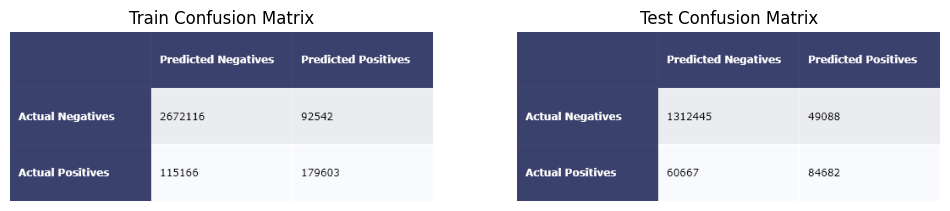

In [16]:
plot_confusion_matrix(
    confusion_matrix(y_train, model.predict(X_train)), 
    confusion_matrix(y_test, y_pred),
)

In [15]:
result_df = features_data[["gameId", "playId", "nflId", "frameId"]].copy()

In [16]:
result_df["tackling_probability"] = model.predict_proba(X)[:,1]

<Axes: ylabel='Frequency'>

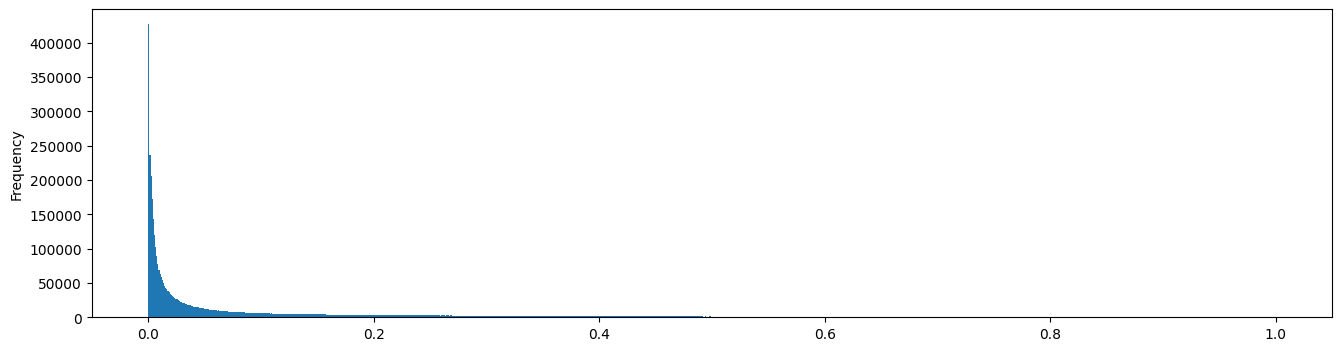

In [17]:
result_df["tackling_probability"].plot.hist(bins=1000, figsize=(16,4))

In [18]:
result_df

,gameId,playId,nflId,frameId,tackling_probability
0,2022091111,76,38551.0,3,0.003946
1,2022091111,76,42391.0,3,0.053450
2,2022091111,76,43411.0,3,0.002747
3,2022091111,76,46187.0,3,0.000327
4,2022091111,76,46214.0,3,0.000654
...,...,...,...,...,...
416136,2022110700,3787,52627.0,40,0.028729
416137,2022110700,3787,53460.0,40,0.047986
416138,2022110700,3787,53533.0,40,0.021858
416139,2022110700,3787,54541.0,40,0.766604


In [19]:
tracking = pd.concat([pd.read_csv(f"../data/tracking_week_{i}.csv") for i in range(1,10)])

In [20]:
tackling_probability = tracking[["gameId", "playId", "nflId", "frameId"]].merge(result_df, how="left", on=["gameId", "playId", "nflId", "frameId"])

In [21]:
tackling_probability["tackling_probability"] = tackling_probability["tackling_probability"].fillna(0)

In [22]:
tackling_probability.to_csv("../data/tackling_probability.csv", index=False)

In [23]:
model.save_model("../models/model_probability")

In [24]:
import pickle

In [25]:
pickle.dump(model, open("../models/model_probability.pkl", 'wb'))